In [1]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

In [2]:
results_dir = '../results'

def plot(filenames, line_colors, thread, param, param_title):
    results = {
        'write_data': None,
        'seq_data': None,
        'rand_data': None
    }

    for filename, line_color in zip(filenames, line_colors):
        with open(os.path.join(results_dir, filename), 'r') as f:
            results[f'{filename[:-5]}_data'] = json.loads(f.read())['datas']  

        x = list()
        y = list()
        for itr in results[f'{filename[:-5]}_data']:
            x.append(int(itr['sec']))
            y.append(float(itr[param]))
            
        plt.plot(x, y, markersize=10, linewidth=3.0, color=line_color)

    plt.legend(['Write', 'Sequential read', 'Random read'])
    plt.xlabel('Time (s)')
    plt.ylabel(f"{param_title}")
    plt.title(f"rados - {param} - thread {thread}")
    plt.savefig(os.path.join(results_dir, f"rados_{param}_bench_thread_{thread}.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.cla()
    plt.clf()

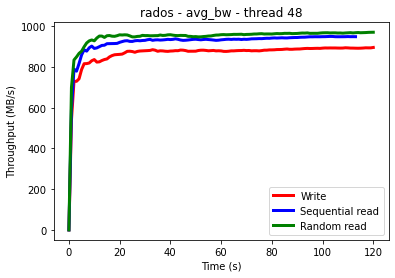

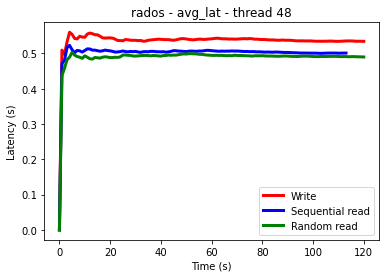

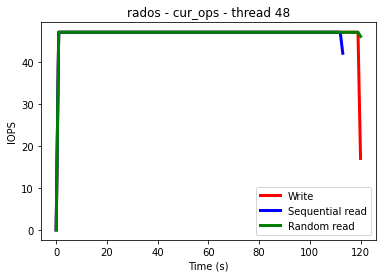

<Figure size 432x288 with 0 Axes>

In [3]:
threads = os.environ.get("THREADS").split(" ")
for thread in threads:
    plot([f"write-{thread}.json", f"seq-{thread}.json", f"rand-{thread}.json"], ['red', 'blue', 'green'], thread, 'avg_bw', "Throughput (MB/s)")
    plot([f"write-{thread}.json", f"seq-{thread}.json", f"rand-{thread}.json"], ['red', 'blue', 'green'], thread, 'avg_lat', "Latency (s)")
    plot([f"write-{thread}.json", f"seq-{thread}.json", f"rand-{thread}.json"], ['red', 'blue', 'green'], thread, 'cur_ops', "IOPS")

In [4]:
def read_output_file(filename):
    with open(os.path.join(results_dir,filename), 'r') as f:
        data = json.loads(f.read()) 

    througput = data['bytes_per_sec']/(1024*1024)
    iops = data['iops']
    return (througput, iops)


def find_osd_result_files():
    osd_result_files = []
    files = os.listdir(results_dir)
    for file in files:
        if file.startswith('osd.'):
            osd_result_files.append(file)
            
    return osd_result_files

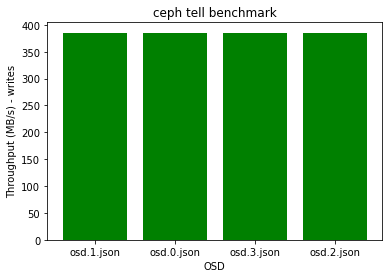

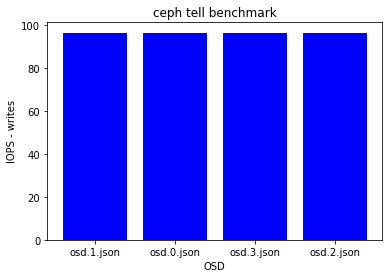

In [5]:
througputs = []
iops_list = []
osds = []
osd_result_files = find_osd_result_files()

for osd_result_file in osd_result_files:
    throughput, iops = read_output_file(osd_result_file)
    osds.append(osd_result_file)
    througputs.append(throughput)
    iops_list.append(iops)

plt.xlabel('OSD')
plt.ylabel('Throughput (MB/s) - writes')
plt.title('ceph tell benchmark')
plt.bar(osds, througputs, color="green")
plt.savefig(os.path.join(results_dir, 'osd_throughput_benchmarks.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.cla()
plt.clf()

plt.xlabel('OSD')
plt.ylabel('IOPS - writes')
plt.title('ceph tell benchmark')
plt.bar(osds, iops_list, color="blue")
plt.savefig(os.path.join(results_dir, 'osd_iops_benchmarks.png'), dpi=300, bbox_inches='tight')
plt.show()